<h2><font color="#004D7F" size=6>Módulo 4. Machine Learning</font></h2>



<h1><font color="#004D7F" size=5> One Hot Encoding </font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Luisa López Vázquez</font><br>
<font color="#004D7F" size=3>Diplomado en Ciencia de Datos</font><br>

<h1><font color="#004D7F" size=5> Preprocesamiento de Datos </font></h1>

Implementación de One Hot Encoding en un data set relacionado a Recursos Humanos, en las variables de "Sexo" y "Ciudadanía".

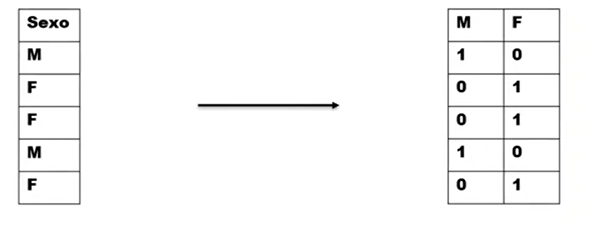

In [1]:
import pandas as pd
import numpy as np

In [16]:
df_rh = pd.read_csv("HRDataset_v14.csv")

In [17]:
#Mostrar los datos
df_rh.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [18]:
#Crear un nuevo data set
df_rh1 = df_rh[["Employee_Name","Position","State","Sex","DOB","MaritalDesc","CitizenDesc","Department",
                "PerformanceScore","EngagementSurvey","EmpSatisfaction"]]

In [22]:
#Ver el tamaño
df_rh1.shape

(311, 11)

In [23]:
#Hacer un describe
df_rh1.describe()

,EngagementSurvey,EmpSatisfaction
count,311.000000,311.000000
mean,4.110000,3.890675
std,0.789938,0.909241
min,1.120000,1.000000
25%,3.690000,3.000000
50%,4.280000,4.000000
75%,4.700000,5.000000
max,5.000000,5.000000


In [24]:
#Hacer un head()
df_rh1.head()

,Employee_Name,Position,State,Sex,DOB,MaritalDesc,CitizenDesc,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction
0,"Adinolfi, Wilson K",Production Technician I,MA,M,07/10/83,Single,US Citizen,Production,Exceeds,4.60,5
1,"Ait Sidi, Karthikeyan",Sr. DBA,MA,M,05/05/75,Married,US Citizen,IT/IS,Fully Meets,4.96,3
2,"Akinkuolie, Sarah",Production Technician II,MA,F,09/19/88,Married,US Citizen,Production,Fully Meets,3.02,3
3,"Alagbe,Trina",Production Technician I,MA,F,09/27/88,Married,US Citizen,Production,Fully Meets,4.84,5
4,"Anderson, Carol",Production Technician I,MA,F,09/08/89,Divorced,US Citizen,Production,Fully Meets,5.00,4


In [30]:
#Crear datos dummys de la columna sex
dummy_sex = pd.get_dummies(df_rh1["Sex"], prefix='sex')

In [29]:
#Vemos que contiene
dummy_sex.head(10)

,sexo_F,sexo_M
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [31]:
#Eliminamos la anterior columna
df_rh1 = df_rh1.drop(["Sex"], axis=1)

In [32]:
#vemos el tamaño
df_rh1.shape

(311, 10)

In [34]:
#Concatenamos el dataframe
df_rh2 = pd.concat([df_rh1,dummy_sex], axis=1)

In [35]:
#Vemos el tamaña
df_rh2.shape

(311, 12)

In [36]:
#Hacemos un head()
df_rh2.head()

,Employee_Name,Position,State,DOB,MaritalDesc,CitizenDesc,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,sex_F,sex_M
0,"Adinolfi, Wilson K",Production Technician I,MA,07/10/83,Single,US Citizen,Production,Exceeds,4.60,5,0,1
1,"Ait Sidi, Karthikeyan",Sr. DBA,MA,05/05/75,Married,US Citizen,IT/IS,Fully Meets,4.96,3,0,1
2,"Akinkuolie, Sarah",Production Technician II,MA,09/19/88,Married,US Citizen,Production,Fully Meets,3.02,3,1,0
3,"Alagbe,Trina",Production Technician I,MA,09/27/88,Married,US Citizen,Production,Fully Meets,4.84,5,1,0
4,"Anderson, Carol",Production Technician I,MA,09/08/89,Divorced,US Citizen,Production,Fully Meets,5.00,4,1,0


In [38]:
#Creamos una funcion para cambiar a numerica la ciudadania
def createdummies(df,columna):
    dummy= pd.get_dummies(df[columna], prefix=columna)
    df = df.drop(columna, axis=1)
    df= pd.concat([df,dummy], axis=1)
    return df
createdummies(df_rh2,"CitizenDesc")

,Employee_Name,Position,State,DOB,MaritalDesc,Department,PerformanceScore,EngagementSurvey,EmpSatisfaction,sex_F,sex_M,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen
0,"Adinolfi, Wilson K",Production Technician I,MA,07/10/83,Single,Production,Exceeds,4.60,5,0,1,0,0,1
1,"Ait Sidi, Karthikeyan",Sr. DBA,MA,05/05/75,Married,IT/IS,Fully Meets,4.96,3,0,1,0,0,1
2,"Akinkuolie, Sarah",Production Technician II,MA,09/19/88,Married,Production,Fully Meets,3.02,3,1,0,0,0,1
3,"Alagbe,Trina",Production Technician I,MA,09/27/88,Married,Production,Fully Meets,4.84,5,1,0,0,0,1
4,"Anderson, Carol",Production Technician I,MA,09/08/89,Divorced,Production,Fully Meets,5.00,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",Production Technician II,MA,05/11/85,Single,Production,Fully Meets,4.07,4,0,1,0,0,1
307,"Ybarra, Catherine",Production Technician I,MA,05/04/82,Single,Production,PIP,3.20,2,1,0,0,0,1
308,"Zamora, Jennifer",CIO,MA,08/30/79,Single,IT/IS,Exceeds,4.60,5,1,0,0,0,1
309,"Zhou, Julia",Data Analyst,MA,02/24/79,Single,IT/IS,Fully Meets,5.00,3,1,0,0,0,1


In [15]:
#llamamos la funcion createdummies


### Conclusión

En el último resultado podemos observar la implementación completa del ONE HOT ENCODING en las variables de "Sexo" y "Ciudadanía"

Esta tecnica es parte del prepocesamiento de datos antes de realizar algun modelo predictivo